EDA of Stock Market Dataset

Dataset: https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data

The aim is to visualise and obtain data driven insights from and using the features from the dataset describing the price history and trading volumes of the fifty stocks in the index NIFTY 50 from NSE (National Stock Exchange) India. This can be helpful for investors, trader as well as finance researchers to notice market trends and make informed decisions


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df = pd.read_csv(f"C:\\Users\\HP\\Downloads\\archive (6)\\NIFTY50_all.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [4]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
235187,2021-04-26,ZEEL,EQ,188.00,190.6,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.0,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.8,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.8,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894
235191,2021-04-30,ZEEL,EQ,186.55,185.3,190.95,183.65,185.00,185.60,187.53,11435285,2.144440e+14,62607.0,3323909.0,0.2907


In [5]:
df.shape


(235192, 15)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Trades              120344 non-null  float64
 13  Deliverable Volume  219115 non-null  float64
 14  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(3

In [7]:
df.isnull().sum()


Date                       0
Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                114848
Deliverable Volume     16077
%Deliverble            16077
dtype: int64

In [8]:
df.describe()


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.00000,2.351920e+05,2.351920e+05,1.203440e+05,2.191150e+05,219115.000000
mean,1266.196349,1267.759708,1286.581440,1247.488465,1266.388302,1266.554351,1267.13230,3.045903e+06,1.610138e+14,6.196427e+04,1.315098e+06,0.502997
std,2581.370320,2585.259609,2619.649216,2546.621396,2581.392543,2582.140942,2582.69998,7.333981e+06,3.298085e+14,6.866457e+04,2.831670e+06,0.190019
min,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.21000,3.000000e+00,1.047000e+07,1.100000e+01,5.000000e+00,0.023600
25%,274.300000,275.000000,279.500000,269.600000,274.400000,274.350000,274.69750,2.190095e+05,1.612816e+13,2.183400e+04,1.253830e+05,0.364700
50%,566.500000,567.025000,576.900000,556.500000,567.000000,566.700000,566.94000,1.010938e+06,6.832603e+13,4.406800e+04,5.017560e+05,0.511000
75%,1242.200000,1243.312500,1263.000000,1221.650000,1242.900000,1242.400000,1242.66250,3.019851e+06,1.863835e+14,7.893550e+04,1.452233e+06,0.638400
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.24000,4.810589e+08,3.564334e+16,1.643015e+06,2.325307e+08,1.000000


In [9]:
# Check if null values in Deliverable Volume and %Deliverble are in same rows
deliv_vol_null = df[df['Deliverable Volume'].isnull()]
deliv_pct_null = df[df['%Deliverble'].isnull()]

print("Number of null values in Deliverable Volume:", len(deliv_vol_null))
print("Number of null values in %Deliverble:", len(deliv_pct_null))
print("\nAre they the same rows?", deliv_vol_null.index.equals(deliv_pct_null.index))

# Display first few rows where either column is null to verify
print("\nSample rows with null values:")
print(df[df['Deliverable Volume'].isnull() | df['%Deliverble'].isnull()].head())

Number of null values in Deliverable Volume: 16077
Number of null values in %Deliverble: 16077

Are they the same rows? True

Sample rows with null values:
            Date      Symbol Series  Prev Close   Open   High    Low   Last  \
3322  2000-01-03  ASIANPAINT     EQ      361.20  370.0  390.0  370.0  385.0   
3323  2000-01-04  ASIANPAINT     EQ      381.65  380.0  392.0  375.0  390.0   
3324  2000-01-05  ASIANPAINT     EQ      385.55  371.5  390.0  371.5  383.0   
3325  2000-01-06  ASIANPAINT     EQ      383.00  384.9  384.9  374.5  375.1   
3326  2000-01-07  ASIANPAINT     EQ      377.50  376.0  390.0  370.0  389.0   

       Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
3322  381.65  380.54    3318  1.262617e+11     NaN                 NaN   
3323  385.55  383.50    4818  1.847699e+11     NaN                 NaN   
3324  383.00  379.81    2628  9.981384e+10     NaN                 NaN   
3325  377.50  379.88    3354  1.274114e+11     NaN                 NaN   

In [11]:
#dropping these columns
df.dropna(subset=['Deliverable Volume', '%Deliverble'], inplace=True)
df.isnull().sum()

Date                      0
Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                98771
Deliverable Volume        0
%Deliverble               0
dtype: int64

In [12]:
#replacing null values
df_tre_mean = df['Trades'].mean()
df_tre_median = df['Trades'].median()  
df_tre_mode = df['Trades'].mode()
df_tre_mean

np.float64(61964.27098151964)

In [13]:
df_tre_median


np.float64(44068.0)

In [15]:
df.fillna(df['Trades'].median(), inplace=True)
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [16]:
#fill null with median
df.sample(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
162997,2008-02-29,POWERGRID,EQ,111.50,110.8,113.00,108.10,109.20,109.90,110.98,9268575,1.028587e+14,44068.0,3016805.0,0.3255
218995,2020-03-16,UPL,EQ,410.85,392.3,394.95,373.50,374.80,376.80,383.10,5282609,2.023753e+14,97972.0,2080209.0,0.3938
45614,2018-09-12,CIPLA,EQ,654.90,654.9,662.00,643.25,653.75,656.45,653.24,3302191,2.157112e+14,55692.0,623369.0,0.1888
60262,2004-06-14,GAIL,EQ,167.05,168.0,169.50,164.15,165.05,165.35,166.02,4300887,7.140511e+13,44068.0,962439.0,0.2238
197833,2004-11-29,TCS,EQ,1216.85,1216.0,1247.70,1205.55,1247.00,1243.90,1232.02,660186,8.133641e+13,44068.0,278261.0,0.4215


In [17]:
df['Trades'] = df['Trades'].astype(int)
df['Deliverable Volume'] = df['Deliverable Volume'].astype(int)
df['%Deliverble'] = df['%Deliverble'].astype(float)

In [18]:
# Convert Turnover to billions and rename column
df['Turnover_Billions'] = df['Turnover'] / 1e9
df = df.drop('Turnover', axis=1)

In [19]:
df = df.drop(['Symbol', 'Series'], axis=1)

In [21]:
df

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Trades,Deliverable Volume,%Deliverble,Turnover_Billions
0,2007-11-27,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,44068,9859619,0.3612,2.687719e+06
1,2007-11-28,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,44068,1453278,0.3172,4.312765e+05
2,2007-11-29,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,44068,1069678,0.2088,4.550658e+05
3,2007-11-30,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,44068,1260913,0.2735,4.283257e+05
4,2007-12-03,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,44068,816123,0.2741,2.875200e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,52374,2340188,0.2739,1.600451e+05
235188,2021-04-27,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,73673,5425957,0.3808,2.698636e+05
235189,2021-04-28,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,44056,2413974,0.2864,1.591917e+05
235190,2021-04-29,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,60932,2744472,0.2894,1.777471e+05


In [25]:
df.describe()


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Trades,Deliverable Volume,%Deliverble,Turnover_Billions
count,219115.000000,219115.000000,219115.000000,219115.000000,219115.000000,219115.000000,219115.000000,2.191150e+05,2.191150e+05,2.191150e+05,219115.000000,2.191150e+05
mean,1312.798810,1314.452039,1333.484986,1294.029456,1313.122336,1313.310053,1313.865487,3.210513e+06,5.389713e+04,1.315098e+06,0.502997,1.700621e+05
std,2646.206042,2650.221844,2684.981456,2611.243954,2646.366636,2647.141818,2647.652264,7.546782e+06,5.166038e+04,2.831670e+06,0.190019,3.387467e+05
min,0.000000,10.200000,10.350000,10.000000,10.150000,10.200000,10.250000,6.000000e+00,1.100000e+01,5.000000e+00,0.023600,2.790000e-02
25%,294.150000,294.850000,299.800000,289.425000,294.200000,294.350000,294.595000,2.835140e+05,3.955550e+04,1.253830e+05,0.364700,2.139437e+04
50%,594.000000,595.000000,605.800000,584.000000,594.500000,594.300000,594.960000,1.121892e+06,4.406800e+04,5.017560e+05,0.511000,7.607706e+04
75%,1285.850000,1286.475000,1305.000000,1266.150000,1286.000000,1286.350000,1286.420000,3.215792e+06,4.887700e+04,1.452233e+06,0.638400,1.969533e+05
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.240000,4.810589e+08,1.643015e+06,2.325307e+08,1.000000,3.564334e+07


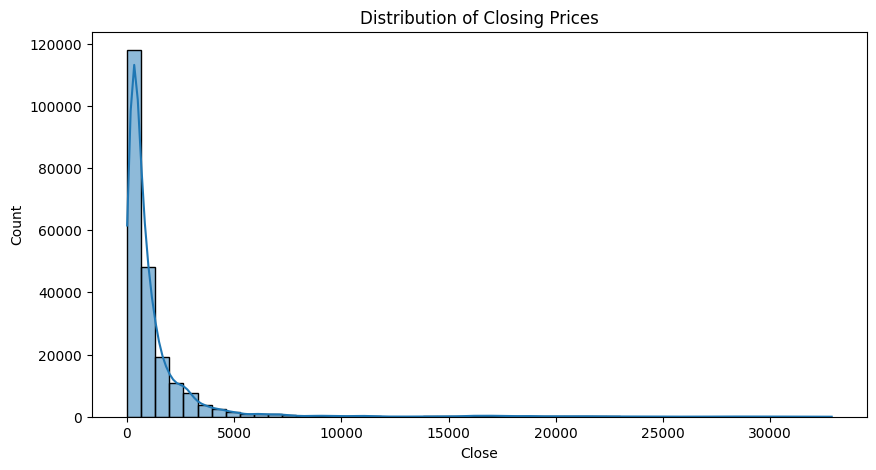

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.show()

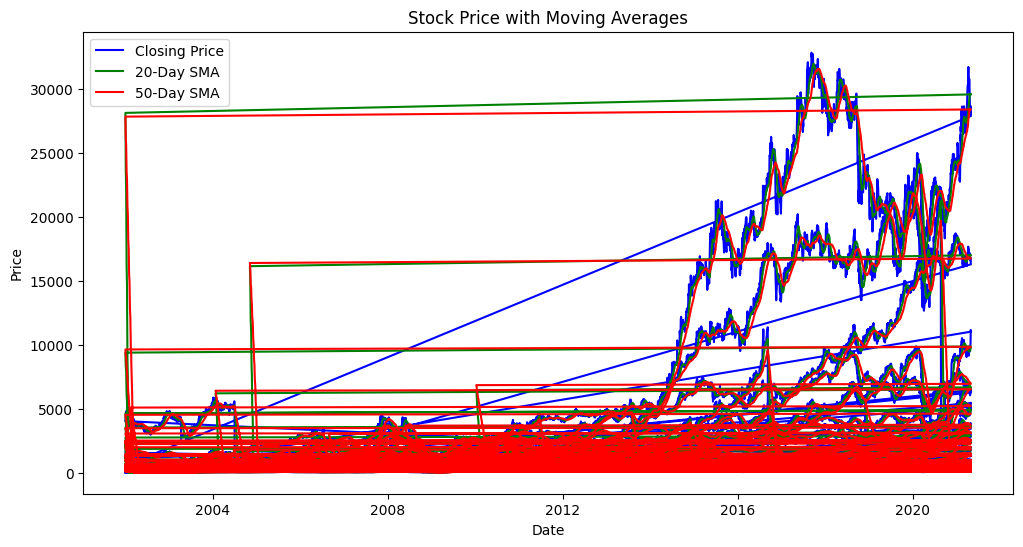

In [28]:
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# Plot moving averages
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Closing Price", color='blue')
plt.plot(df['SMA_20'], label="20-Day SMA", color='green')
plt.plot(df['SMA_50'], label="50-Day SMA", color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with Moving Averages')
plt.legend()
plt.show()

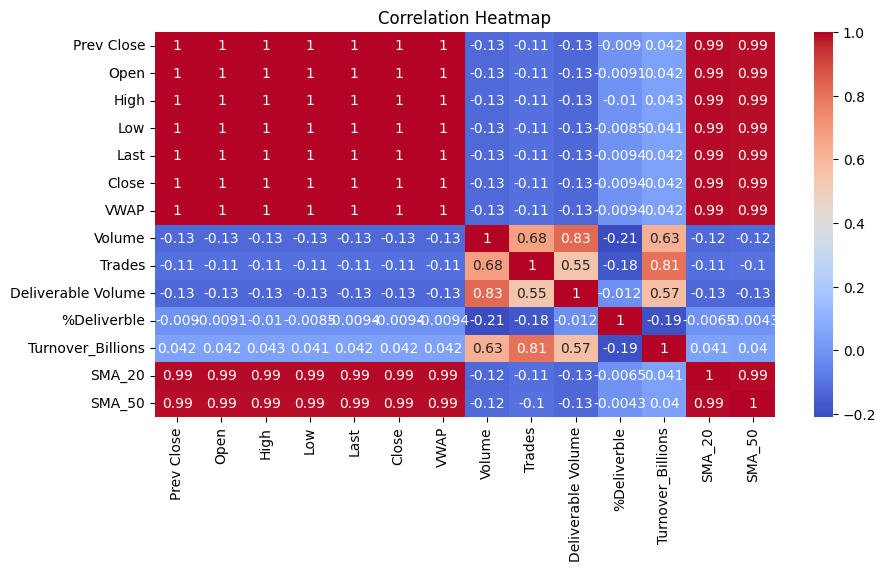

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

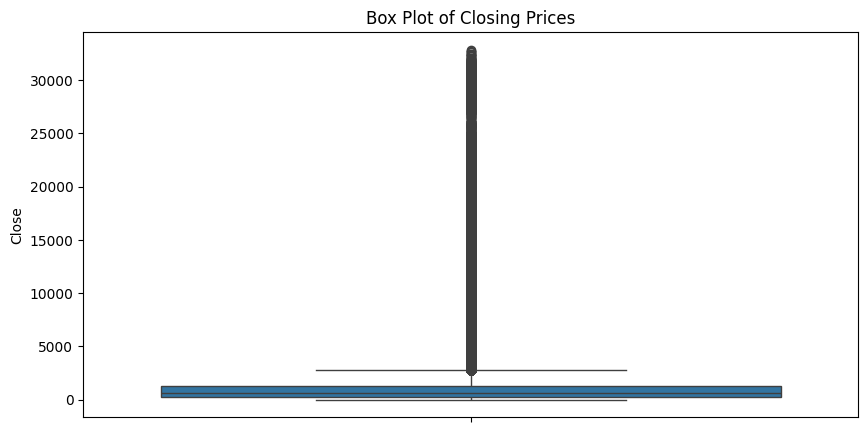

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Close'])
plt.title('Box Plot of Closing Prices')
plt.show()

In [31]:
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Trades,Deliverable Volume,%Deliverble,Turnover_Billions,SMA_20,SMA_50
Date,,,,,,,,,,,,,,
2007-11-27,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,44068,9859619,0.3612,2.687719e+06,NaN,NaN
2007-11-28,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,44068,1453278,0.3172,4.312765e+05,NaN,NaN
2007-11-29,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,44068,1069678,0.2088,4.550658e+05,NaN,NaN
2007-11-30,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,44068,1260913,0.2735,4.283257e+05,NaN,NaN
2007-12-03,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,44068,816123,0.2741,2.875200e+05,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,52374,2340188,0.2739,1.600451e+05,196.5925,206.604
2021-04-27,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,73673,5425957,0.3808,2.698636e+05,195.7400,206.052
2021-04-28,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,44056,2413974,0.2864,1.591917e+05,195.3900,205.489


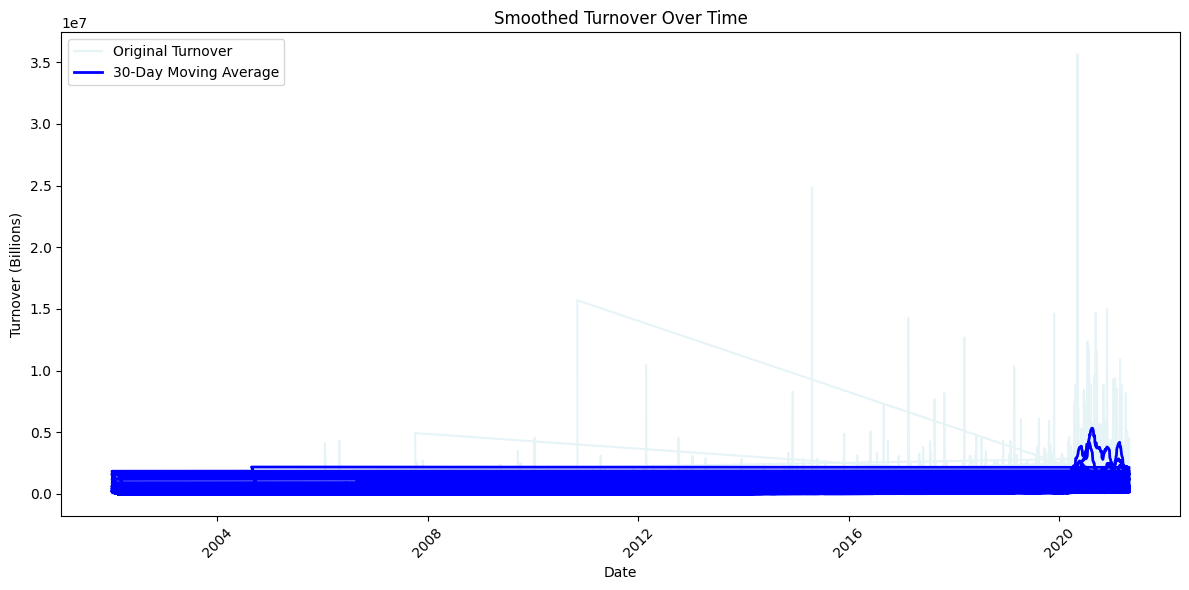

In [32]:
# Create a figure showing turnover over time with smoothing
plt.figure(figsize=(12,6))

# Calculate rolling average for smoothing (30 day window)
rolling_avg = df['Turnover_Billions'].rolling(window=30).mean()

# Plot original turnover as light line
plt.plot(df.index, df['Turnover_Billions'], color='lightblue', alpha=0.3, label='Original Turnover')

# Plot smoothed turnover line
plt.plot(df.index, rolling_avg, color='blue', linewidth=2, label='30-Day Moving Average')

# Customize the plot
plt.title('Smoothed Turnover Over Time')
plt.xlabel('Date')
plt.ylabel('Turnover (Billions)')

# Add legend
plt.legend(loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()